## Introduction
The most exciting thing about Basketball is that like in any other sports, each player is free to pick and play their own style. May it be sharpshooter, or slasher, or defensive anchor, the playing basketball is only limited to a player's imagination. With the development of position-less basketball led by National Basketball Association, it becomes imperative to look beyond traditional positions like Point Guard or Center to determine the best groupings to represent different types of playstyle.

This project's objective is two fold:
1. Is traditional positions the best ways to group the players.
2. If not, are there more appropriate groupings to represent each style of play.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO  
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data Wrangling

In [2]:
def wrangle(url, filter_tag, filter_prop, cols_to_drop=None):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html5lib')
    table_stats_html = soup.find(filter_tag, filter_prop)
    table_stats = StringIO(str(table_stats_html))
    df = pd.read_html(table_stats)[0]
    df.drop(columns=cols_to_drop, inplace=True)
    return df

#### Scraping Regular Stats

In [3]:
url = "https://www.basketball-reference.com/leagues/NBA_2024_per_game.html"
filter_tag = "div"
filter_prop = {"id" : "div_per_game_stats"}
df_reg_stats = wrangle(url, filter_tag, filter_prop, ['Awards', "Rk"])
# drop league Average Row or Last Row
df_reg_stats.drop(df_reg_stats.shape[0] - 1, inplace=True)
print("Shape", df_reg_stats.shape)
print(df_reg_stats.info())
df_reg_stats.head()

Shape (735, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  735 non-null    object 
 1   Age     735 non-null    float64
 2   Team    735 non-null    object 
 3   Pos     735 non-null    object 
 4   G       735 non-null    float64
 5   GS      735 non-null    float64
 6   MP      735 non-null    float64
 7   FG      735 non-null    float64
 8   FGA     735 non-null    float64
 9   FG%     727 non-null    float64
 10  3P      735 non-null    float64
 11  3PA     735 non-null    float64
 12  3P%     689 non-null    float64
 13  2P      735 non-null    float64
 14  2PA     735 non-null    float64
 15  2P%     722 non-null    float64
 16  eFG%    727 non-null    float64
 17  FT      735 non-null    float64
 18  FTA     735 non-null    float64
 19  FT%     676 non-null    float64
 20  ORB     735 non-null    float64
 21  DRB     735 non-null   

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Joel Embiid,29.0,PHI,C,39.0,39.0,33.6,11.5,21.8,0.529,...,0.883,2.4,8.6,11.0,5.6,1.2,1.7,3.8,2.9,34.7
1,Luka Dončić,24.0,DAL,PG,70.0,70.0,37.5,11.5,23.6,0.487,...,0.786,0.8,8.4,9.2,9.8,1.4,0.5,4.0,2.1,33.9
2,Giannis Antetokounmpo,29.0,MIL,PF,73.0,73.0,35.2,11.5,18.8,0.611,...,0.657,2.7,8.8,11.5,6.5,1.2,1.1,3.4,2.9,30.4
3,Shai Gilgeous-Alexander,25.0,OKC,PG,75.0,75.0,34.0,10.6,19.8,0.535,...,0.874,0.9,4.7,5.5,6.2,2.0,0.9,2.2,2.5,30.1
4,Jalen Brunson,27.0,NYK,PG,77.0,77.0,35.4,10.3,21.4,0.479,...,0.847,0.6,3.1,3.6,6.7,0.9,0.2,2.4,1.9,28.7


#### Scraping Advanced Stats

In [4]:
url = "https://www.basketball-reference.com/leagues/NBA_2024_advanced.html"
filter_tag = "div"
filter_prop = {"id" : "div_advanced"}
df_adv_stats = wrangle(url, filter_tag, filter_prop, ['Awards', 'Rk'])
# drop league Average Row or Last Row
df_adv_stats.drop(df_adv_stats.shape[0] - 1, inplace=True)
print("Shape", df_adv_stats.shape)
print(df_adv_stats.info())
df_adv_stats.head()

Shape (735, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  735 non-null    object 
 1   Age     735 non-null    float64
 2   Team    735 non-null    object 
 3   Pos     735 non-null    object 
 4   G       735 non-null    float64
 5   GS      735 non-null    float64
 6   MP      735 non-null    float64
 7   PER     735 non-null    float64
 8   TS%     727 non-null    float64
 9   3PAr    727 non-null    float64
 10  FTr     727 non-null    float64
 11  ORB%    735 non-null    float64
 12  DRB%    735 non-null    float64
 13  TRB%    735 non-null    float64
 14  AST%    735 non-null    float64
 15  STL%    735 non-null    float64
 16  BLK%    735 non-null    float64
 17  TOV%    728 non-null    float64
 18  USG%    735 non-null    float64
 19  OWS     735 non-null    float64
 20  DWS     735 non-null    float64
 21  WS      735 non-null   

,Player,Age,Team,Pos,G,GS,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,DeMar DeRozan,34.0,CHI,SF,79.0,79.0,2989.0,19.7,0.584,0.166,...,7.7,25.8,7.0,2.2,9.2,0.147,2.1,-0.3,1.8,2.8
1,Domantas Sabonis,27.0,SAC,C,82.0,82.0,2928.0,23.2,0.637,0.081,...,17.9,22.2,8.6,4.0,12.6,0.206,4.0,2.4,6.5,6.2
2,Coby White,23.0,CHI,PG,79.0,78.0,2881.0,14.5,0.570,0.460,...,11.1,22.7,3.1,1.6,4.7,0.078,0.7,-1.3,-0.7,0.9
3,Mikal Bridges,27.0,BRK,SF,82.0,82.0,2854.0,14.9,0.560,0.457,...,10.3,24.3,2.1,2.1,4.2,0.070,0.7,-1.0,-0.4,1.2
4,Paolo Banchero,21.0,ORL,PF,80.0,80.0,2799.0,17.3,0.546,0.249,...,13.0,29.7,1.3,4.0,5.3,0.090,1.3,0.0,1.3,2.3


### Check for duplicated Player Entries

In [5]:
print(df_reg_stats["Player"].duplicated().sum())
print(df_adv_stats["Player"].duplicated().sum())

163
163


In [6]:
df_adv_stats[df_adv_stats["Player"].duplicated()].head()

,Player,Age,Team,Pos,G,GS,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
15,Pascal Siakam,29.0,TOR,PF,39.0,39.0,1354.0,18.8,0.600,0.233,...,10.3,25.3,2.4,0.6,3.0,0.106,2.2,-0.8,1.4,1.2
16,Pascal Siakam,29.0,IND,PF,41.0,41.0,1303.0,20.7,0.602,0.156,...,7.4,25.2,3.0,0.9,3.9,0.143,3.0,-0.5,2.5,1.5
34,Dennis Schröder,30.0,TOR,PG,51.0,33.0,1559.0,13.9,0.559,0.394,...,11.7,19.4,2.0,0.5,2.5,0.076,-0.5,-1.3,-1.8,0.1
35,Dennis Schröder,30.0,BRK,PG,29.0,25.0,927.0,12.3,0.535,0.402,...,15.0,21.8,0.3,0.5,0.8,0.042,-0.5,-1.4,-1.9,0.0
70,P.J. Washington,25.0,CHO,PF,44.0,17.0,1286.0,13.0,0.545,0.479,...,10.7,21.2,0.0,0.8,0.8,0.028,-1.7,-1.1,-2.8,-0.3


As it turns out, players who were traded in the middle season have different entries. Let us fix them by calculating for the weighted average stats given by:

$$
S_{new} = \sum^n_{k=1} \omega_k S_k 
$$

Where

$n$ is the number of teams a player is/was part of.

$S_k$ is the a statistic (like points, assists, etc.) of $k_{th}$ row.

$\omega_k$ is the proportion of the games played (`G`) on $k_{th}$ row over total games played.


In [7]:
def weighted_average(df):
    duplicated = df[df["Player"].duplicated()]
    result = []
    
    for player in duplicated['Player'].unique():
        row_k = {}
    
        # Delete rows in df_adv_stats with corresponding player 
        df = df[df["Player"] != player]
        
        # Look for rows with specified player
        mask = duplicated['Player'] == player
        df_k = duplicated[mask]
    
        # Total Games
        row_k["G"] = df_k['G'].sum()
        weight = df_k['G'] / row_k["G"]
        row_k["GS"] = df_k['GS'].sum()
        
        # Get all the numerical column without `G` and `GS`
        for col in duplicated.select_dtypes("number").drop(columns=["G", "GS"]).columns:
            row_k[col] = (df_k[col] * weight).sum()
        # Get all the non-numeric column
        for col in duplicated.select_dtypes("object").columns:
            #Get last occurence
            row_k[col] = df_k.iloc[-1][col]
        result.append(row_k)
    
    aggregated = pd.DataFrame(result)
    df_new = pd.concat([df, aggregated], ignore_index=True)
    return df_new

#### Handling Duplicates for `df_reg_stats`

In [8]:
df_reg_stats_new = weighted_average(df_reg_stats)
df_reg_stats_new.head()

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Joel Embiid,29.0,PHI,C,39.0,39.0,33.6,11.5,21.8,0.529,...,0.883,2.4,8.6,11.0,5.6,1.2,1.7,3.8,2.9,34.7
1,Luka Dončić,24.0,DAL,PG,70.0,70.0,37.5,11.5,23.6,0.487,...,0.786,0.8,8.4,9.2,9.8,1.4,0.5,4.0,2.1,33.9
2,Giannis Antetokounmpo,29.0,MIL,PF,73.0,73.0,35.2,11.5,18.8,0.611,...,0.657,2.7,8.8,11.5,6.5,1.2,1.1,3.4,2.9,30.4
3,Shai Gilgeous-Alexander,25.0,OKC,PG,75.0,75.0,34.0,10.6,19.8,0.535,...,0.874,0.9,4.7,5.5,6.2,2.0,0.9,2.2,2.5,30.1
4,Jalen Brunson,27.0,NYK,PG,77.0,77.0,35.4,10.3,21.4,0.479,...,0.847,0.6,3.1,3.6,6.7,0.9,0.2,2.4,1.9,28.7


#### Handling Duplicates for `df_adv_stats`

In [9]:
df_adv_stats_new = weighted_average(df_adv_stats)
df_adv_stats_new.head()

,Player,Age,Team,Pos,G,GS,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,DeMar DeRozan,34.0,CHI,SF,79.0,79.0,2989.0,19.7,0.584,0.166,...,7.7,25.8,7.0,2.2,9.2,0.147,2.1,-0.3,1.8,2.8
1,Domantas Sabonis,27.0,SAC,C,82.0,82.0,2928.0,23.2,0.637,0.081,...,17.9,22.2,8.6,4.0,12.6,0.206,4.0,2.4,6.5,6.2
2,Coby White,23.0,CHI,PG,79.0,78.0,2881.0,14.5,0.570,0.460,...,11.1,22.7,3.1,1.6,4.7,0.078,0.7,-1.3,-0.7,0.9
3,Mikal Bridges,27.0,BRK,SF,82.0,82.0,2854.0,14.9,0.560,0.457,...,10.3,24.3,2.1,2.1,4.2,0.070,0.7,-1.0,-0.4,1.2
4,Paolo Banchero,21.0,ORL,PF,80.0,80.0,2799.0,17.3,0.546,0.249,...,13.0,29.7,1.3,4.0,5.3,0.090,1.3,0.0,1.3,2.3


#### Delete `Team` column for both
Let us now delete the `Team` column for it serves no purpose going forward.

In [10]:
df_adv_stats_new.drop(columns="Team", inplace=True)
df_reg_stats_new.drop(columns="Team", inplace=True)

# Check for duplicates again
print(df_reg_stats_new["Player"].duplicated().sum())
print(df_adv_stats_new["Player"].duplicated().sum())

0
0


### Checking for common columns between advanced and regular stats

In [11]:
common_columns = list(set(df_adv_stats_new.columns) & set(df_reg_stats_new.columns))
common_columns

['MP', 'GS', 'G', 'Player', 'Pos', 'Age']

Let's remove these columns but the *Player* column from `df_adv_stats`.

In [12]:
df_adv_stats_new.drop(columns=[x for x in common_columns if x != "Player"], inplace=True, errors="ignore")

### Join Regular and Advanced Stats
Before anything, let us check if there exist an uncommon *Player* between the two sets.

$Let \ \ A = \text{Set of Elements of df\_reg\_stats['Player']}$

$Let \ \ B = \text{Set of Elements of df\_adv\_stats['Player']}$

To get the elements that is not common between two sets, we'll have to compute for the following:

$(A \cap B)^c = U - (A \cap B)$

where $U$ is the universal set. In our case, $U = A \cup B$ are the overall pool of players.

So, $(A \cap B)^c = U - (A \cap B) = (A \cup B) - (A \cap B)$ ; will be the set where a player exist on one of the two sets ($A$ and $B$) but not both.

In [13]:
universal_set = set(pd.concat([df_reg_stats_new['Player'], df_adv_stats_new['Player']]))
reg_inter_adv = set(df_reg_stats_new['Player']) & set(df_adv_stats_new['Player'])
# To get the uncommon element between the two
complement_inter = universal_set - reg_inter_adv 
complement_inter

set()

It appear that there is no uncommon player between the two sets. 

With that in mind, we can now proceed to combine the two table. We ought to get same row count while combining the column count of the two table.

In [14]:
df_with_name = pd.merge(df_reg_stats_new, df_adv_stats_new, on="Player", how="left")

#save for later
df_pos = pd.get_dummies(df_with_name["Pos"], prefix="Pos", dtype=int, drop_first=True)

mapping = {"PG" : 1, "SG" : 2, "SF" : 3, "PF" : 4, "C" : 5}
pos = df_with_name['Pos'].map(mapping)

df = df_with_name.drop(columns=["Player", "Pos"]).fillna(0)

print(df.shape)
print(df.columns)
df.head()

(572, 46)
Index(['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')


,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,29.0,39.0,39.0,33.6,11.5,21.8,0.529,1.4,3.6,0.388,...,12.5,39.6,5.2,2.3,7.5,0.275,8.5,3.1,11.6,4.5
1,24.0,70.0,70.0,37.5,11.5,23.6,0.487,4.1,10.6,0.382,...,12.8,36.0,8.5,3.5,12.0,0.220,8.3,1.7,9.9,8.0
2,29.0,73.0,73.0,35.2,11.5,18.8,0.611,0.5,1.7,0.274,...,12.7,33.0,9.5,3.7,13.2,0.246,6.7,2.4,9.0,7.2
3,25.0,75.0,75.0,34.0,10.6,19.8,0.535,1.3,3.6,0.353,...,8.4,32.8,10.5,4.2,14.6,0.275,6.7,2.3,9.0,7.1
4,27.0,77.0,77.0,35.4,10.3,21.4,0.479,2.7,6.8,0.401,...,9.1,32.5,8.8,2.4,11.2,0.198,6.3,-0.4,5.8,5.4


## Exploratory Data Analysis

### Missing data

In [15]:
df.isna().sum().sum()

0

### Data Types

In [16]:
df.dtypes.value_counts()

float64    46
Name: count, dtype: int64

### Summary Statistics

In [17]:
df.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,...,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,25.743007,46.153846,21.503497,18.651588,3.120768,6.683007,0.447679,0.942466,2.646211,0.298590,...,11.883362,18.139891,1.114887,1.009302,2.125726,0.074919,-1.606331,-0.184039,-1.791193,0.515675
std,4.225107,25.535953,26.906890,9.906921,2.459292,4.991641,0.112812,0.879519,2.241424,0.149978,...,5.461095,6.289260,1.780847,1.054062,2.645302,0.097490,3.935910,2.045680,5.246317,1.261694
min,19.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-2.500000,0.000000,-1.700000,-0.585000,-18.600000,-10.100000,-28.800000,-1.700000
25%,23.000000,22.000000,0.000000,10.800000,1.300000,3.000000,0.407273,0.200000,0.900000,0.250000,...,9.100000,13.975000,0.000000,0.200000,0.200000,0.038076,-3.200000,-1.000000,-3.600000,-0.100000
50%,25.000000,51.000000,7.000000,17.350000,2.400000,5.100000,0.450000,0.705882,2.100000,0.338500,...,11.473846,17.000000,0.400000,0.700000,1.100000,0.083000,-1.500000,-0.200000,-1.519737,0.000000
75%,28.000000,69.000000,41.250000,27.000000,4.500000,9.100000,0.500000,1.500000,3.825000,0.383652,...,14.100000,21.700000,1.600000,1.600000,3.400000,0.125250,0.400000,0.800000,0.800000,0.800000
max,39.000000,84.000000,82.000000,37.800000,11.500000,23.600000,0.747000,4.800000,11.800000,1.000000,...,57.100000,72.500000,12.000000,5.800000,17.000000,0.665000,29.100000,16.000000,43.300000,10.600000


### Distribution and Outliers

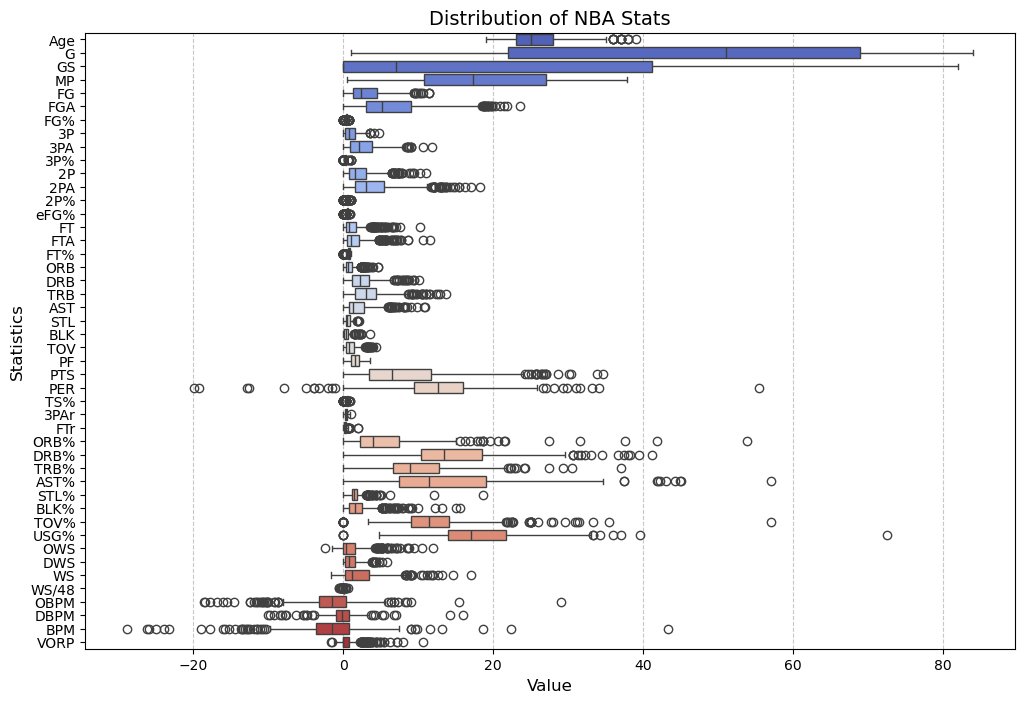

In [18]:
plt.figure(figsize=(12, 8)) 
sns.boxplot(data=df, orient="h", showfliers=True, palette="coolwarm") 
plt.title("Distribution of NBA Stats", fontsize=14)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Statistics", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="x", linestyle="--", alpha=0.7)  
plt.show()


In [19]:
def detect_outliers(data, multiplier=1.5):
    result = {}
    for col in data.columns:
        column = data[col]
        lower, upper = column.quantile([0.25, 0.75])
        iqr = upper - lower
        lower_bound = lower - iqr*multiplier
        upper_bound = upper + iqr*multiplier
        count_in = column.between(lower_bound, upper_bound).sum()
        n = len(column)
        count_out = n - count_in
        result[col] = count_out

    return result

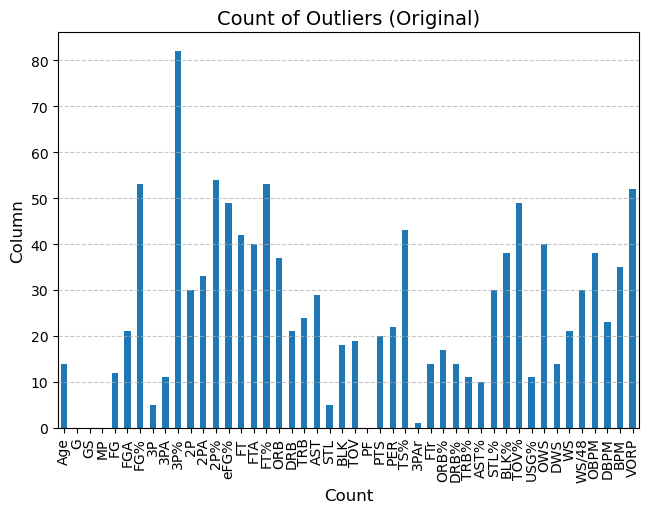

In [20]:
outliers = pd.Series(detect_outliers(df))
outliers.plot(kind="bar")
plt.tight_layout()
plt.title("Count of Outliers (Original)", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Column", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)  
plt.show()

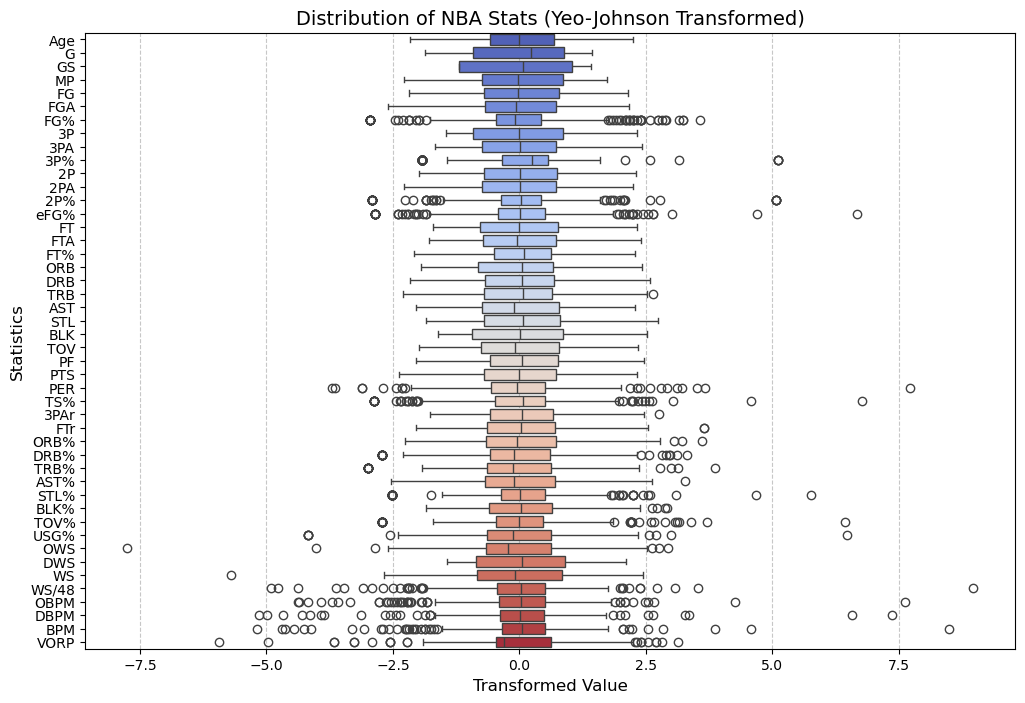

In [21]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
transformed = pt.fit_transform(df)
cols = df.columns

df_trans = pd.DataFrame(transformed, columns=cols)

plt.figure(figsize=(12, 8)) 
sns.boxplot(data=df_trans, orient="h", showfliers=True, palette="coolwarm") 
plt.title("Distribution of NBA Stats (Yeo-Johnson Transformed)", fontsize=14)
plt.xlabel("Transformed Value", fontsize=12)
plt.ylabel("Statistics", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="x", linestyle="--", alpha=0.7)  
plt.show()

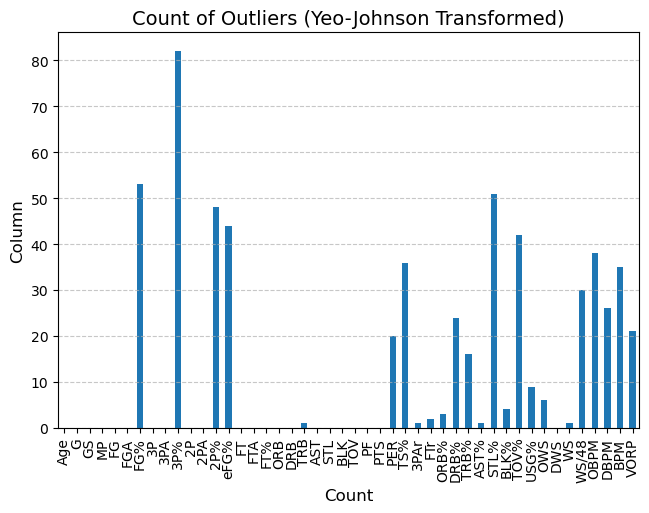

In [22]:
outliers = pd.Series(detect_outliers(df_trans))
outliers.plot(kind="bar")
plt.tight_layout()
plt.title("Count of Outliers (Yeo-Johnson Transformed)", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Column", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)  
plt.show()

### Correlation

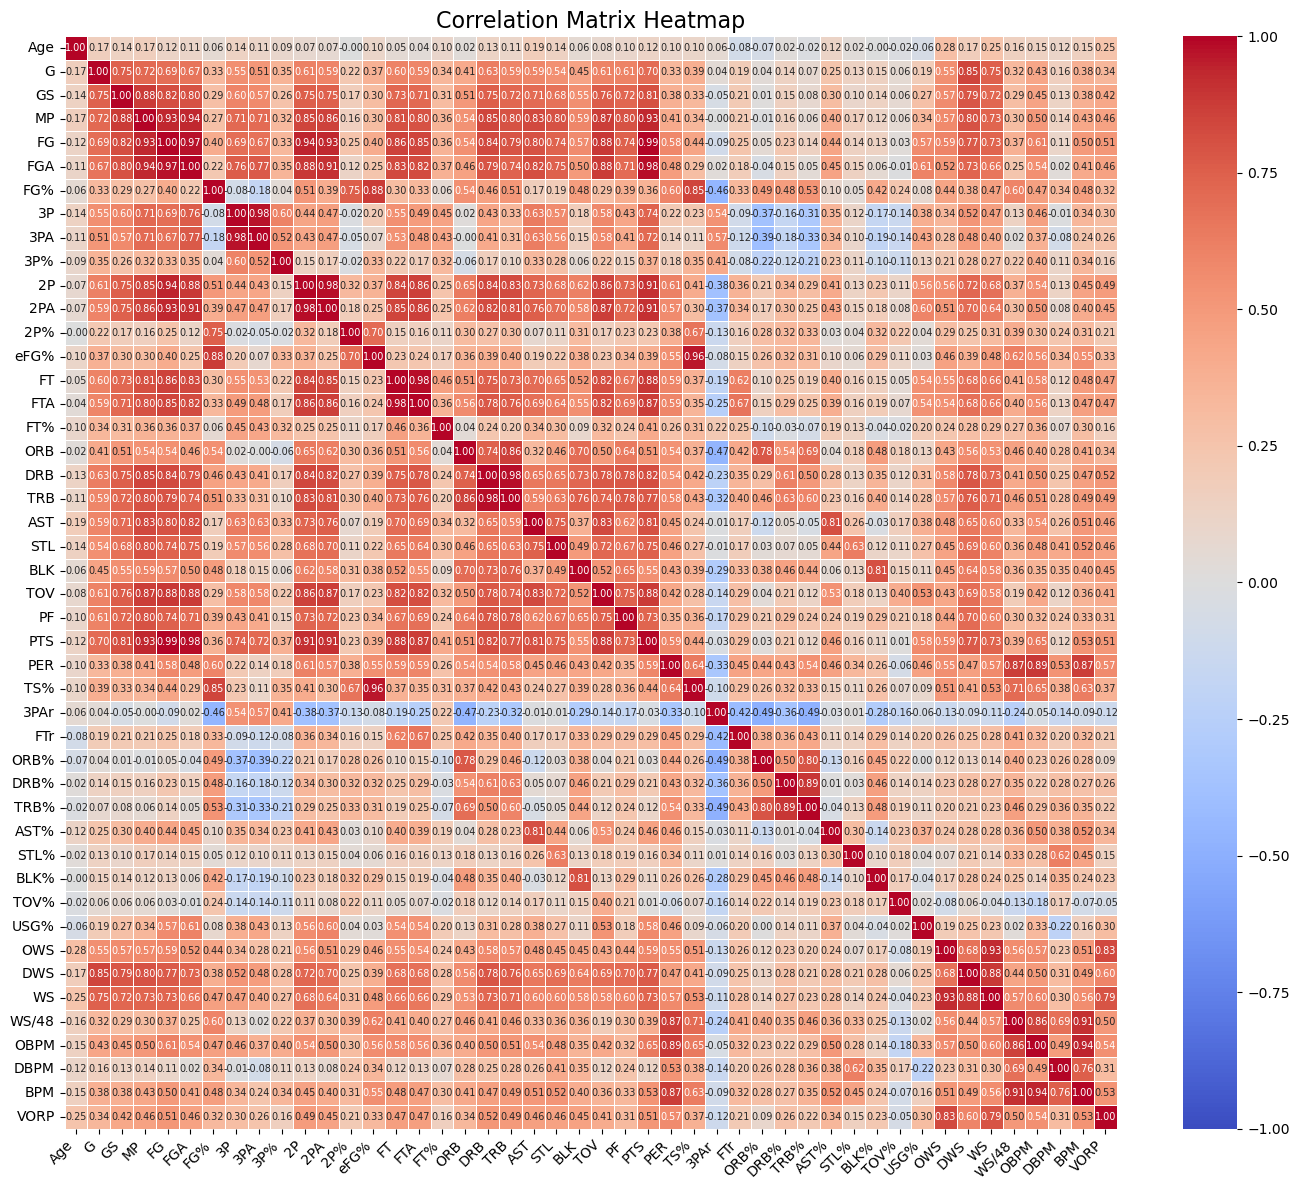

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_trans.corr(numeric_only=True)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(corr, 
                      annot=True,
                      cmap='coolwarm',
                      vmin=-1, vmax=1,
                      fmt='.2f',
                      linewidths=0.5,
                      annot_kws={"size": 7}) 

plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

It is not clear but it appears that there are some pairs of columns that are highly correlated. It is important to drop one of the highly correlated pairs (>.90) to reduce redundancy, prevent bias due to multicollinearity. 

In [24]:
corr_uns = corr.unstack()
corr_uns = corr_uns[corr_uns != 1]
corr_uns[abs(corr_uns) > 0.9]

MP     FG       0.933042
       FGA      0.937233
       PTS      0.934120
FG     MP       0.933042
       FGA      0.974399
       2P       0.941064
       2PA      0.933358
       PTS      0.992628
FGA    MP       0.937233
       FG       0.974399
       2PA      0.911226
       PTS      0.977325
3P     3PA      0.975808
3PA    3P       0.975808
2P     FG       0.941064
       2PA      0.980219
       PTS      0.912002
2PA    FG       0.933358
       FGA      0.911226
       2P       0.980219
       PTS      0.910009
eFG%   TS%      0.963462
FT     FTA      0.983506
FTA    FT       0.983506
DRB    TRB      0.977611
TRB    DRB      0.977611
PTS    MP       0.934120
       FG       0.992628
       FGA      0.977325
       2P       0.912002
       2PA      0.910009
TS%    eFG%     0.963462
OWS    WS       0.929541
WS     OWS      0.929541
WS/48  BPM      0.910065
OBPM   BPM      0.940134
BPM    WS/48    0.910065
       OBPM     0.940134
dtype: float64

Most of these are needed variables to differentiate one play style to other. For that reason, we can't just drop any of these variables. Instead, let us resort to dimensionality reduction. We shall discuss this matter later.


First we need to standardize before we can apply any dimensionality.

#### Standardization
Normally standardization was done with *Z-Scaling* or taking the *Z-Score* of each data point. 

Z-Score is given by:
$$
Z-Score = \frac{x_k - \overline{x}_k}{s_k}
$$

Where:

$x_k$ is the data point in $k$ column.

$\overline{x}_k$ the mean of $k$ column.

and

$s_k$ is the standard deviation of the $k$ column.

By the end of *z-scaling*, the **mean and std should be 0 and 1**, respectively for all columns.

But given that significant amount of outliers and the fact that we can't remove them, let us use a more robust scaling method.

Robust Scaling is given by:
$$
X-scaled = \frac{x_k - Med_k}{IQR_k}
$$

Where:

$x_k$ is the data point in $k$ column.

$ Med_k$ the median of $k$ column.

and

$IQR_k$ is the Interquartile Range of the $k$ column.

By the end of *robust scaling*, the **median and IQR should be 0 and 1**, respectively for all columns.


In [25]:
median = df_trans.agg(['median']).T.squeeze()
lower, upper = df_trans.quantile([0.25,0.75]).to_numpy()
iqr = upper - lower
df_r = df_trans.apply(lambda x: (x - median)/ iqr, axis=1)
print("Median Counts: \n", df_r.median().apply(round).value_counts())

lower, upper = df_r.quantile([0.25,0.75]).to_numpy()
iqr = pd.Series(upper - lower)
print("IQR Counts: \n", iqr.apply(round).value_counts())

Median Counts: 
 0    46
Name: count, dtype: int64
IQR Counts: 
 1    46
Name: count, dtype: int64


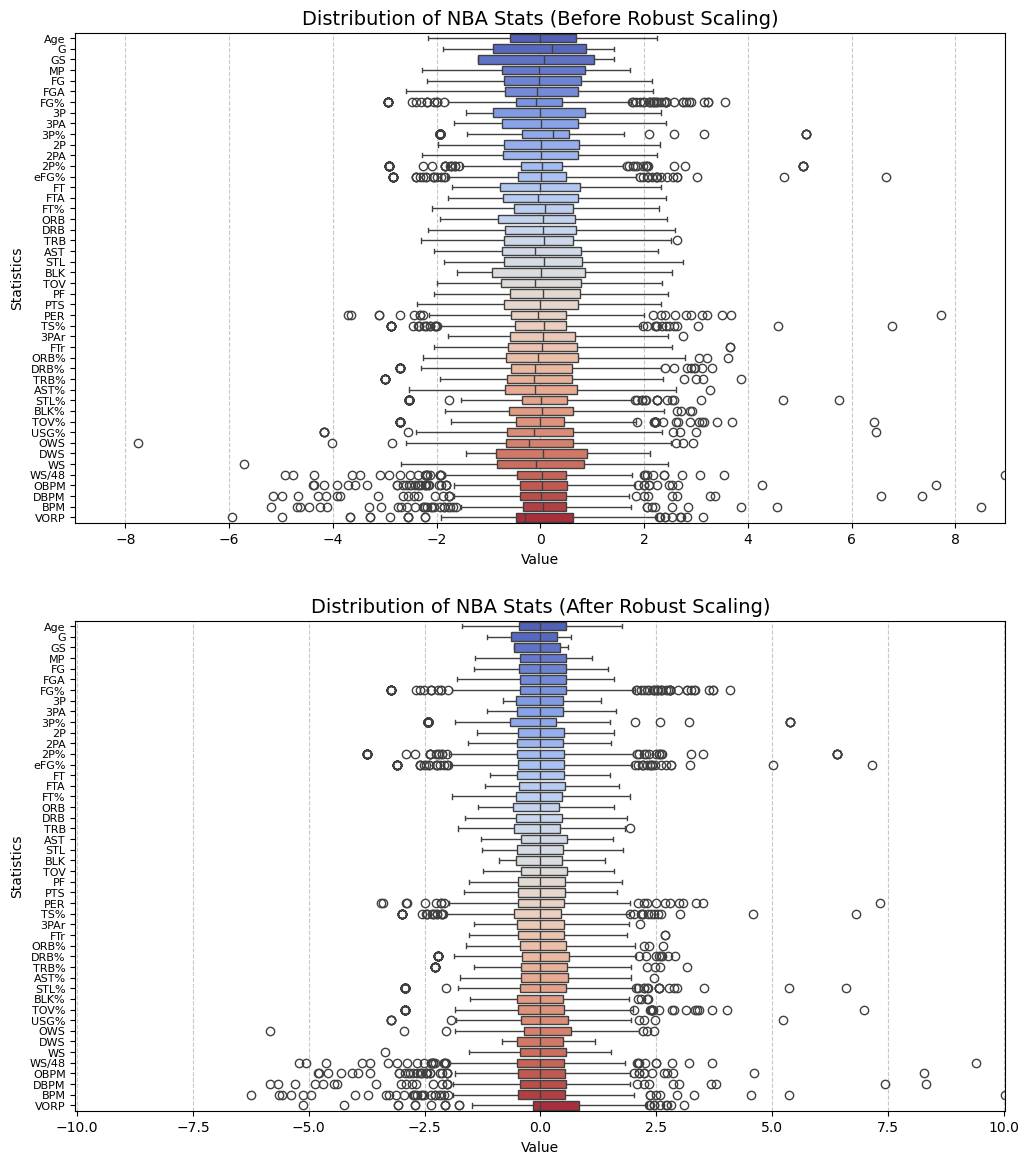

In [26]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12, 14), gridspec_kw={'hspace': 0.2})

# before scaling
sns.boxplot(data=df_trans, orient="h", showfliers=True, palette="coolwarm", ax=ax[0]) 
ax[0].set_title("Distribution of NBA Stats (Before Robust Scaling)", fontsize=14)
ax[0].set_xlabel("Value")
ax[0].set_ylabel("Statistics")
ax[0].grid(axis="x", linestyle="--", alpha=0.7)

# after scaling
sns.boxplot(data=df_r, orient="h", showfliers=True, palette="coolwarm", ax=ax[1]) 
ax[1].set_title("Distribution of NBA Stats (After Robust Scaling)", fontsize=14)
ax[1].set_xlabel("Value")
ax[1].set_ylabel("Statistics")
ax[1].grid(axis="x", linestyle="--", alpha=0.7)

# aligning origin
max_val_before = max(abs(df_trans.min().min()), abs(df_trans.max().max()))
max_val_after = max(abs(df_r.min().min()), abs(df_r.max().max()))

ax[0].set_xlim(-max_val_before, max_val_before)
ax[1].set_xlim(-max_val_after, max_val_after)

for axis in ax:
    axis.tick_params(axis='y', labelsize=8) 
    plt.setp(axis.get_yticklabels(), ha="right", rotation=0) 

plt.show()

Note the number of outliers doesn't change but only minimized their effects. This is because we have done our due diligence of standardizing using Yeo-Jhonson already to reduce the outliers and handle the shape of distribution. The purpuse of Robust-Scaling is to standardize the data for comparison in terms of median and IQR.

In [27]:
outliers_before = pd.Series(detect_outliers(df_trans))
outliers_after = pd.Series(detect_outliers(df_r))
(outliers_before - outliers_after).sum()

0

## Dimensionality Reduction

Now the question remains, what dimensionality reduction technique we could apply in our case to avoid multicollinearity without losing any significant information. Well the most common one is Principal Component Analysis (PCA). I've done my due diligence of using PCA and conducting hierarchical clustering but isn't satisfied with the result so I explored more until I found **T-SNE**.

### T-SNE
Is basically a dimensionality reduction that also preserves the origninal clustering of data points. This is perfect in the case of our clustering problem!

Now what makes this more appropriate than PCA is that T-SNE preserves the local structure of the data (points that are closer will be closer even if the dimensions was reduced). Points that are closed together in a high dimensional space will sometimes be farther away from each other when reduced to lower dimensions using PCA. 

Also, it's a bonus that T-SNE is easier to visualize. 

In [32]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_r.values)

print(X_tsne.shape)

(572, 2)


In [33]:
np.corrcoef(X_tsne.T)

array([[ 1.        , -0.03513381],
       [-0.03513381,  1.        ]])

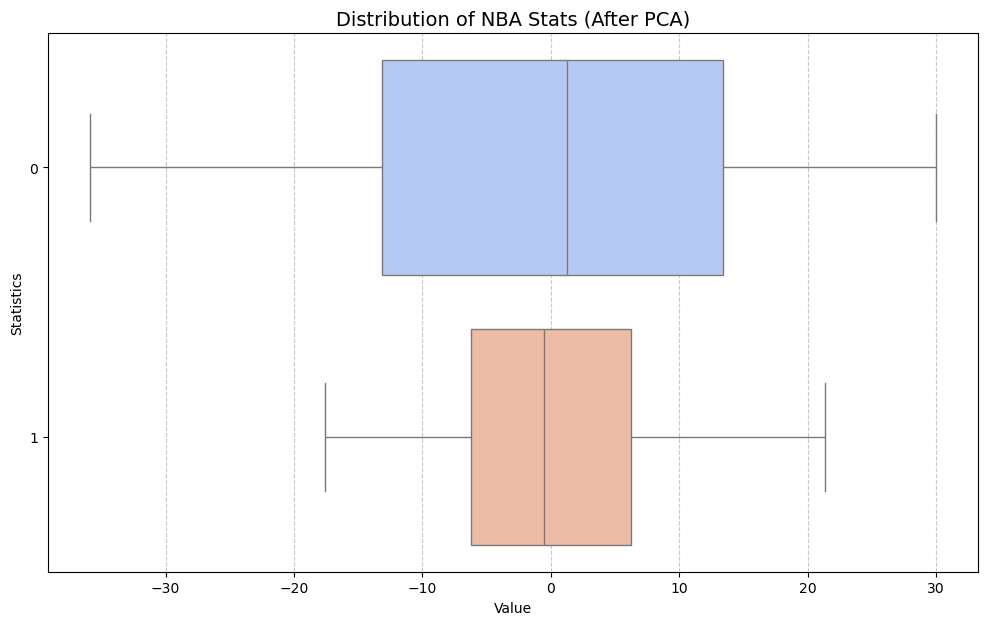

In [ ]:
plt.figure(figsize=(12, 7))

sns.boxplot(data=X_tsne, orient="h", showfliers=True, palette="coolwarm") 
plt.title("Distribution of NBA Stats (After PCA)", fontsize=14)
plt.xlabel("Value")
plt.ylabel("Statistics")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()

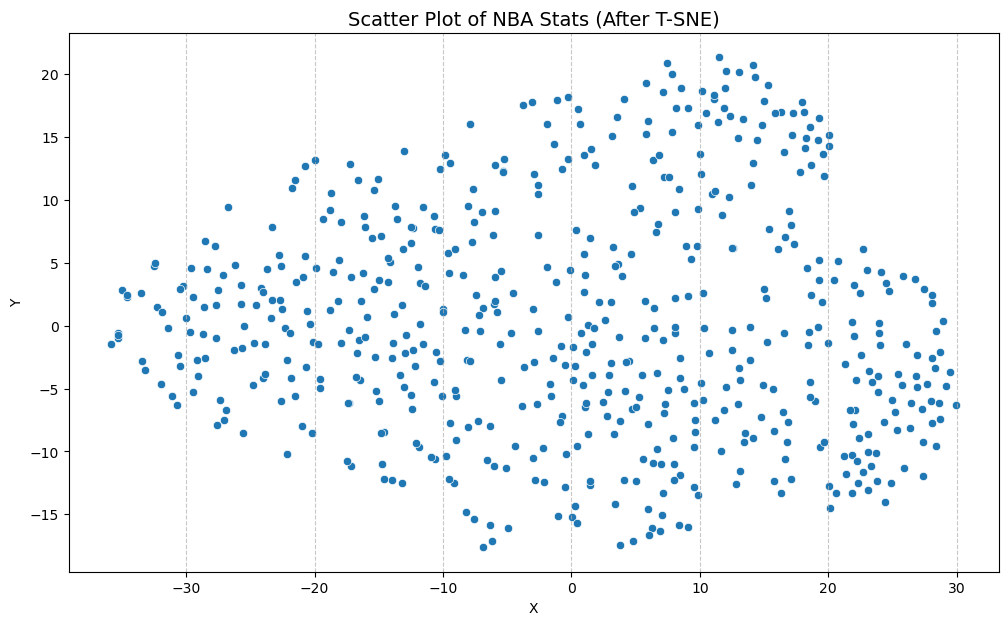

In [ ]:
plt.figure(figsize=(12, 7))

sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1]) 
plt.title("Scatter Plot of NBA Stats (After T-SNE)", fontsize=14)
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()

## Baseline

For the baseline, let us use their position (PG, SG, etc.) as clusters.

In [44]:
from sklearn.metrics import silhouette_score

mapping = {"PG" : 1, "SG" : 2, "SF" : 3, "PF" : 4, "C" : 5}
pos = df_with_name['Pos'].map(mapping)

base_score = silhouette_score(X_tsne, pos, metric='euclidean')
base_score

-0.035653654

For reference, silhouette scores ranges from -1 to 1, where:
* Values near 1 indicate well-separated clusters
* Values near 0 indicate overlapping clusters
* Negative values indicate data points might be assigned to the wrong clusters

As we can see, with silhouette score of approximately -0.0357, clustering based on their traditional positions doesn't equate to meaningful and distinct groups. This makes sense in modern NBA where they played position-less basketball and players are expected to develop diverse skill set.

## Hierarchical Clustering
Let us start with a proper dendogram of different linkage methods to determine which linkage methods to use.


In [ ]:
import numpy as np
import hdbscan
import warnings
from itertools import product
from sklearn.metrics import silhouette_score

X_new = X_tsne

warnings.filterwarnings("ignore", message="'force_all_finite' was renamed")

min_cluster_size_list = list(range(2, 11))
min_samples_list = list(range(1, 11))
cluster_selection_method_list = ['eom', 'leaf']
cluster_selection_epsilon_list = [0.0, 0.1, 0.5, 1.0, 2.0]
leaf_size_list = [30, 40, 50]

results = []

for min_cluster_size, min_samples, method, epsilon, leaf in product(
        min_cluster_size_list, min_samples_list, cluster_selection_method_list, 
        cluster_selection_epsilon_list, leaf_size_list
    ):
    if min_samples > min_cluster_size:
        continue
    
    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=min_cluster_size,
        min_samples=min_samples,
        cluster_selection_epsilon=epsilon, 
        metric='euclidean',
        cluster_selection_method=method,
        leaf_size=leaf
    )
    cluster_labels = clusterer.fit_predict(X_new)
    
    # Count clusters and outliers
    n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
    n_outliers = list(cluster_labels).count(-1)
    perc_outliers = n_outliers / X_new.shape[0] * 100
        
    # Calculate silhouette score only if there are 2+ clusters and not all points are noise
    silhouette_avg = 0
    if n_clusters >= 2 and n_outliers < X_new.shape[0]:
        # Need to filter out noise points (-1) for silhouette calculation
        mask = cluster_labels != -1
        if sum(mask) > 0:  # Make sure we have non-noise points
            try:
                silhouette_avg = silhouette_score(
                    X_new[mask], 
                    cluster_labels[mask], 
                    metric='euclidean'
                )
            except Exception as e:
                # Handle potential errors (e.g., single cluster after filtering)
                silhouette_avg = 0
                print(f"Silhouette calculation error: {e}")

    results.append({
        'min_cluster_size': min_cluster_size,
        'min_samples': min_samples,
        'cluster_selection_method': method,
        'cluster_selection_epsilon': epsilon,
        'leaf_size': leaf,
        'n_clusters': n_clusters,
        'n_outliers': n_outliers,
        'perc_outliers': perc_outliers,
        'silhouette_score': silhouette_avg,
    })

In [49]:
df_res = pd.DataFrame(results)

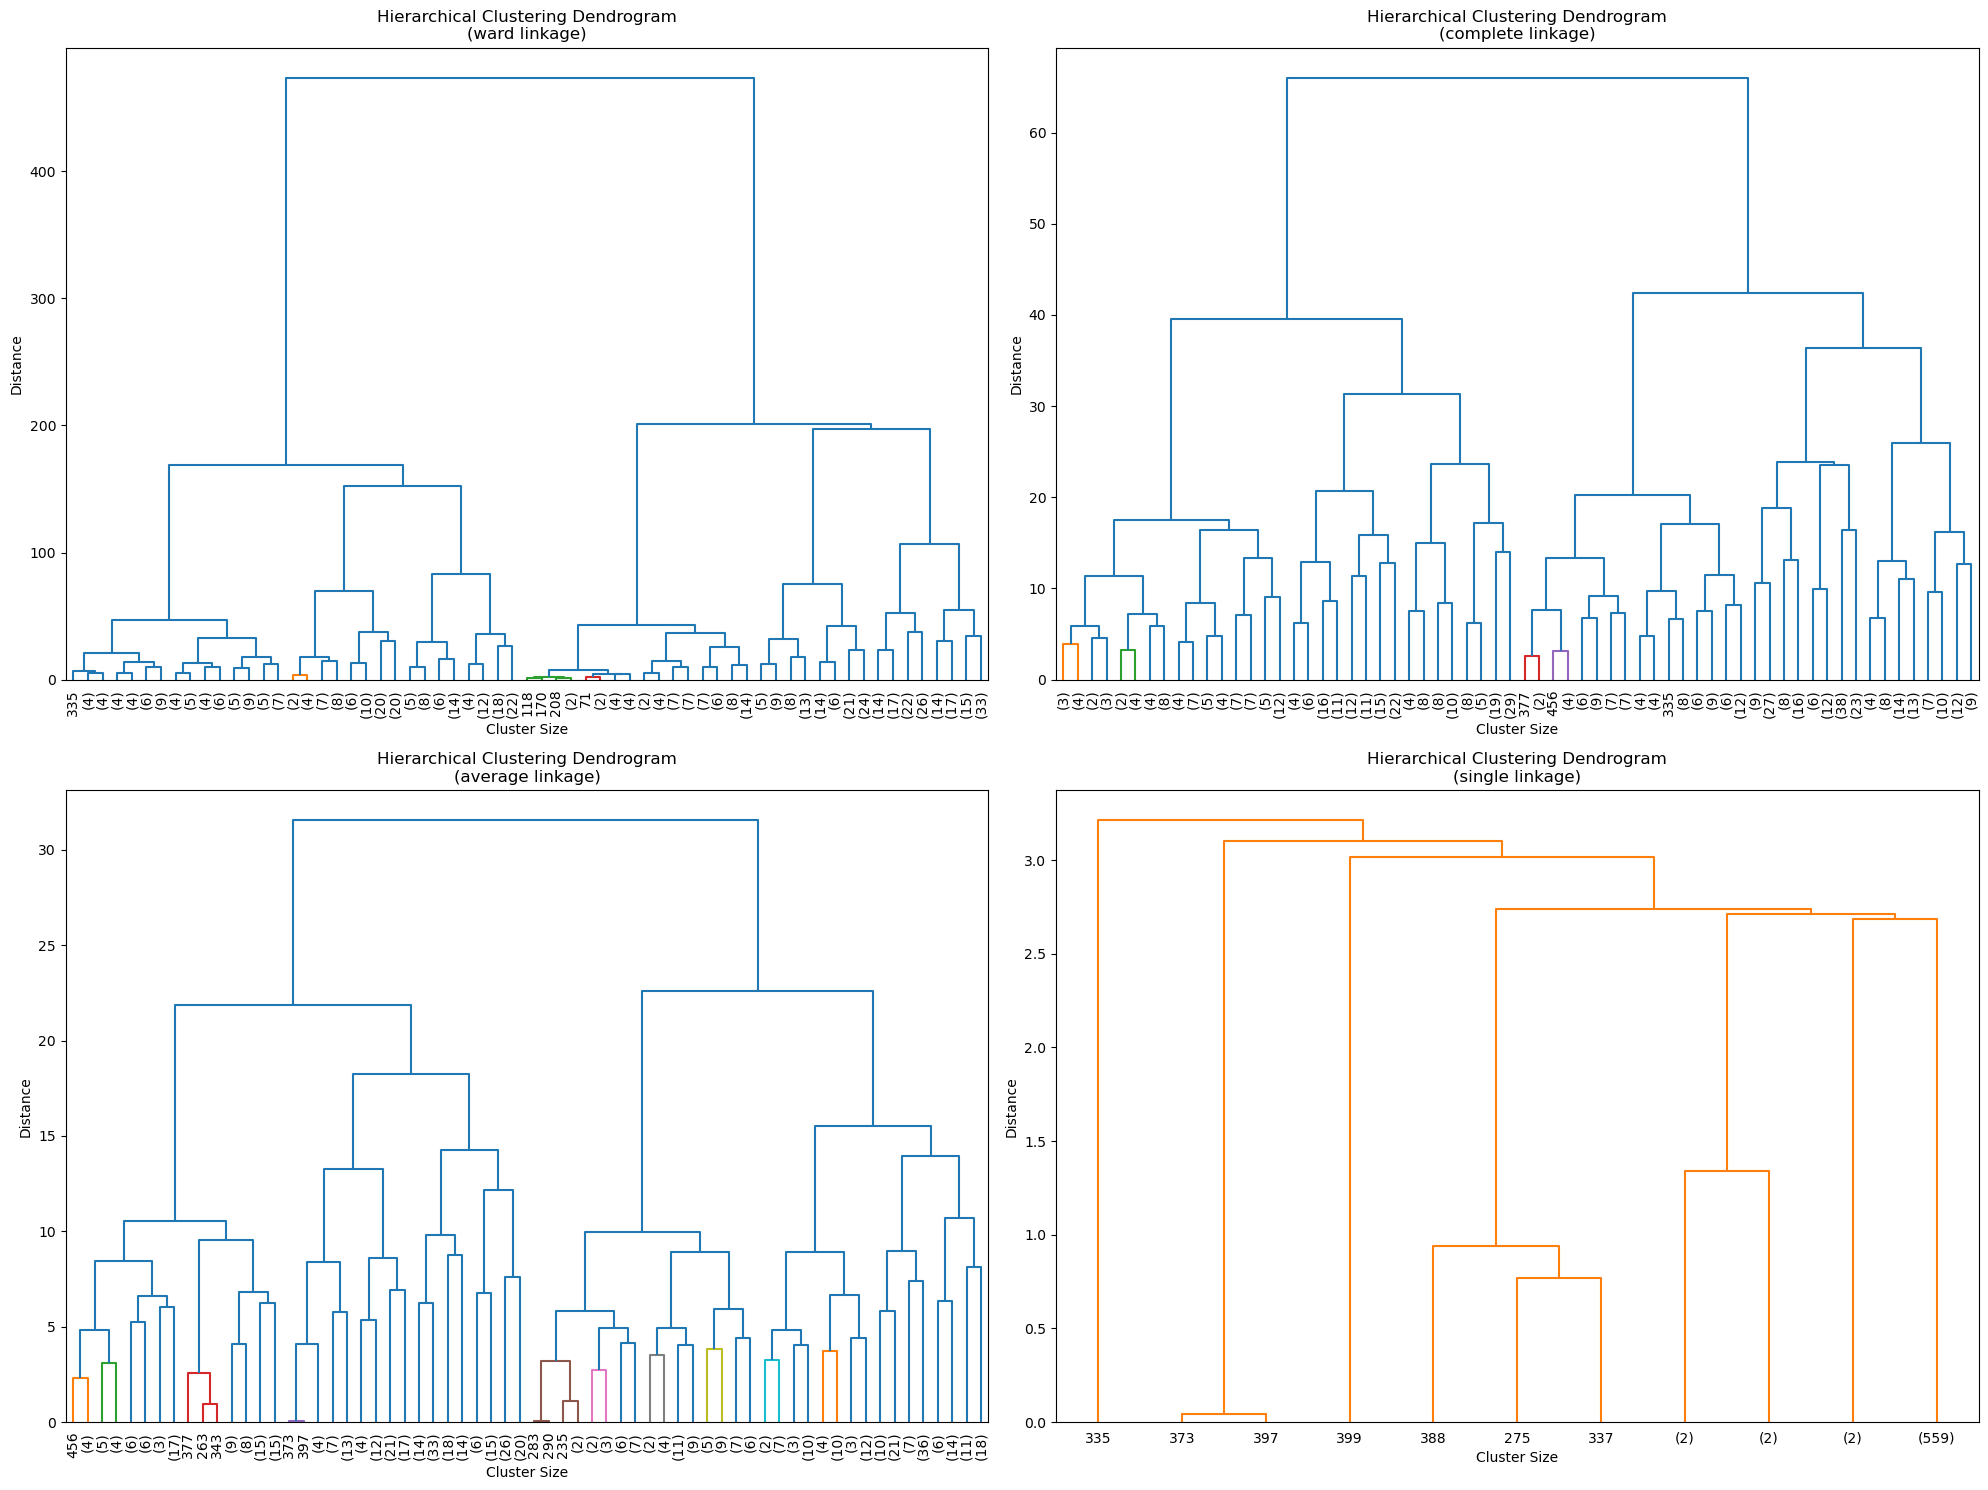

In [79]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_methods = ['ward', 'complete', 'average', 'single']

plt.figure(figsize=(20, 15))

for i, method in enumerate(linkage_methods):

    linkage_matrix = linkage(X_tsne, method=method)
    
    plt.subplot(2, 2, i+1)
    
    dendrogram(
        linkage_matrix,
        truncate_mode='level', 
        p=5, 
        leaf_font_size=10.,
        color_threshold=4.0  
    )
        
    plt.title(f'Hierarchical Clustering Dendrogram\n({method} linkage)')
    plt.xlabel('Cluster Size')
    plt.ylabel('Distance')

plt.tight_layout()
plt.savefig("Dendrograms_Comparison")
plt.show()

It appears that *ward* groupings shows a clear distinct separation from each other. So let's use that.

In [80]:
from sklearn.cluster import AgglomerativeClustering
results = []

for DISTANCE_THRESHOLD in range(10,70):

    clustering = AgglomerativeClustering(
        n_clusters=None,
        linkage='ward',
        distance_threshold=DISTANCE_THRESHOLD,
    )

    cluster_labels = clustering.fit_predict(X_tsne)

    n_clusters = len(set(cluster_labels))

    silhouette_avg = silhouette_score(X_tsne, cluster_labels)

    results.append({
        'distance_threshold': DISTANCE_THRESHOLD,
        'n_clusters': n_clusters,
        'silhouette_score': silhouette_avg,
    })

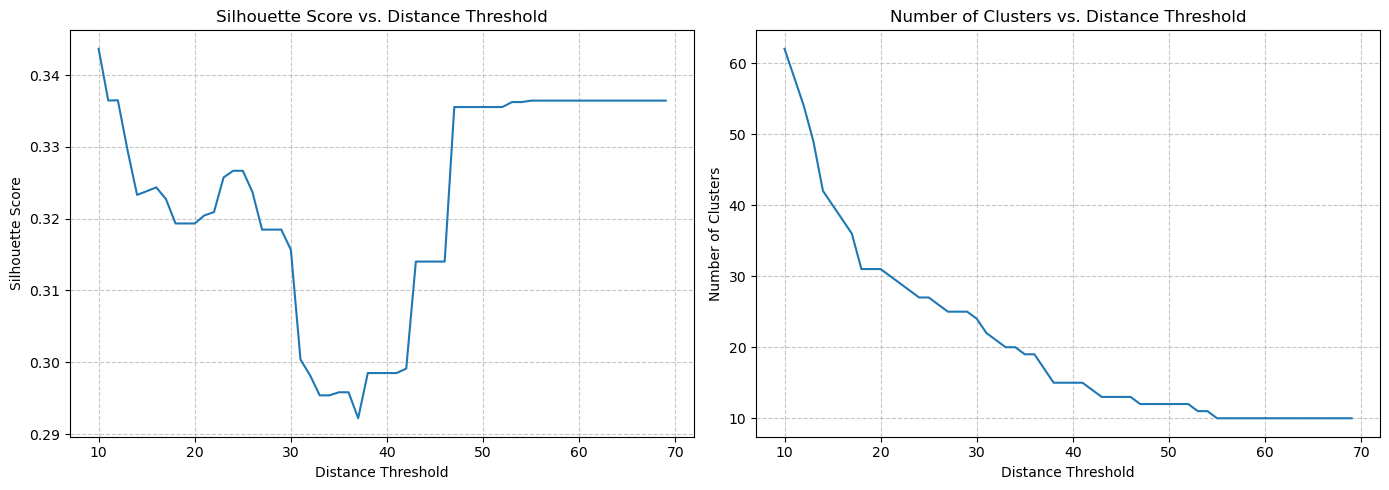

In [81]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

results_df = pd.DataFrame(results).set_index('distance_threshold')
results_df['silhouette_score'].plot(ax=ax[0])
results_df['n_clusters'].plot(ax=ax[1])

ax[0].grid(True, linestyle='--', alpha=0.7)
ax[0].set_title('Silhouette Score vs. Distance Threshold')
ax[0].set_xlabel('Distance Threshold')
ax[0].set_ylabel('Silhouette Score')

ax[1].grid(True, linestyle='--', alpha=0.7)
ax[1].set_title('Number of Clusters vs. Distance Threshold')
ax[1].set_xlabel('Distance Threshold')
ax[1].set_ylabel('Number of Clusters')

plt.tight_layout()
plt.show()

In [82]:
from sklearn.cluster import AgglomerativeClustering

threshold = 24

clustering = AgglomerativeClustering(
    n_clusters=None,
    linkage='ward',
    distance_threshold=threshold,
)

cluster_labels = clustering.fit_predict(X_tsne)

## Interpretation

Number of clusters formed using threshold 24: 27
Silhouette Score: 0.327


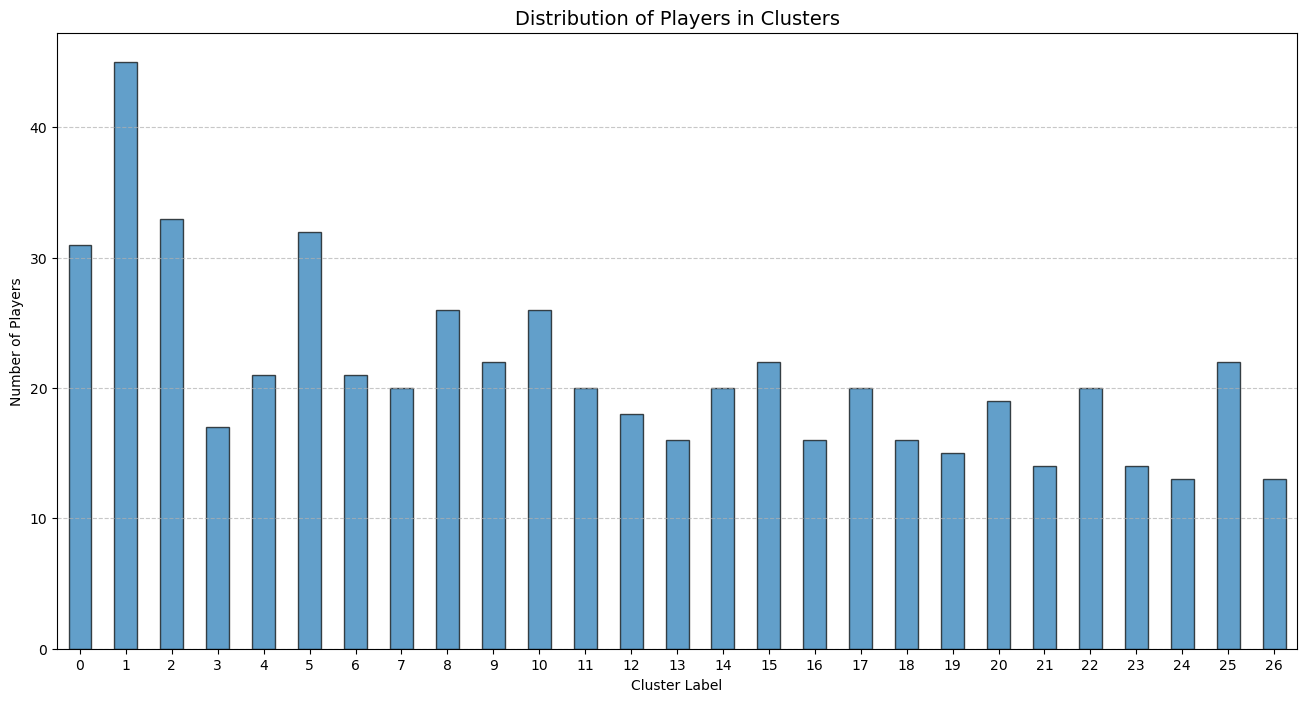

In [87]:

fig = plt.figure(figsize=(16,8))

n_clusters = len(set(cluster_labels))
print(f"Number of clusters formed using threshold {threshold}: {n_clusters}")

silhouette_avg = silhouette_score(X_tsne, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")


unique_labels, counts = np.unique(cluster_labels, return_counts=True)

distribution = pd.Series(counts, index=unique_labels)

distribution.plot(kind='bar', color='C0', alpha=0.7, edgecolor='black')
plt.title('Distribution of Players in Clusters', fontsize=14)
plt.xlabel('Cluster Label')
plt.ylabel('Number of Players')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0);

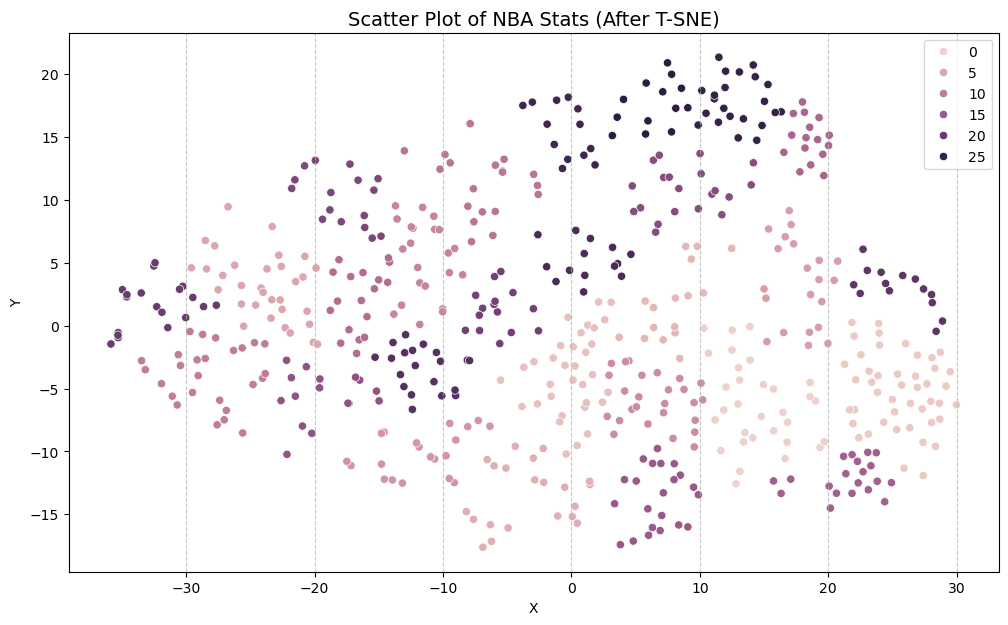

In [176]:
plt.figure(figsize=(12, 7))

sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=cluster_labels) 
plt.title("Scatter Plot of NBA Stats (After T-SNE)", fontsize=14)
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()

In [119]:
samp_df = pd.concat([df_with_name, pd.Series(cluster_labels, name="Cluster")], axis=1)
samp_df.to_csv("NBA_2024_Clustering.csv", index=False)
samp_df.head(10)

,Player,Age,Pos,G,GS,MP,FG,FGA,FG%,3P,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Cluster
0,Joel Embiid,29.0,C,39.0,39.0,33.6,11.5,21.8,0.529,1.4,...,39.6,5.2,2.3,7.5,0.275,8.5,3.1,11.6,4.5,21
1,Luka Dončić,24.0,PG,70.0,70.0,37.5,11.5,23.6,0.487,4.1,...,36.0,8.5,3.5,12.0,0.220,8.3,1.7,9.9,8.0,21
2,Giannis Antetokounmpo,29.0,PF,73.0,73.0,35.2,11.5,18.8,0.611,0.5,...,33.0,9.5,3.7,13.2,0.246,6.7,2.4,9.0,7.2,21
3,Shai Gilgeous-Alexander,25.0,PG,75.0,75.0,34.0,10.6,19.8,0.535,1.3,...,32.8,10.5,4.2,14.6,0.275,6.7,2.3,9.0,7.1,21
4,Jalen Brunson,27.0,PG,77.0,77.0,35.4,10.3,21.4,0.479,2.7,...,32.5,8.8,2.4,11.2,0.198,6.3,-0.4,5.8,5.4,1
5,Devin Booker,27.0,PG,68.0,68.0,36.0,9.4,19.2,0.492,2.2,...,29.8,7.2,2.0,9.2,0.181,4.0,-1.0,3.0,3.1,1
6,Kevin Durant,35.0,PF,75.0,75.0,37.2,10.0,19.1,0.523,2.2,...,29.0,5.1,3.2,8.3,0.142,4.0,0.1,4.0,4.3,1
7,Jayson Tatum,25.0,PF,74.0,74.0,35.7,9.1,19.3,0.471,3.1,...,30.2,6.4,4.1,10.4,0.189,4.5,0.6,5.1,4.7,1
8,De'Aaron Fox,26.0,PG,74.0,74.0,35.9,9.7,20.9,0.465,2.9,...,31.0,3.3,3.2,6.5,0.117,2.6,0.1,2.7,3.2,1
9,Donovan Mitchell,27.0,SG,55.0,55.0,35.3,9.1,19.8,0.462,3.3,...,31.4,3.6,2.9,6.4,0.159,4.6,1.2,5.8,3.9,1


In [112]:
freq = samp_df['Cluster'].value_counts()

In [118]:
print("Frequncy of Clusters in First 100 Players:")

cluster_stats = samp_df.head(100)['Cluster'].value_counts()
cluster_stats

Frequncy of Clusters in First 100 Players:


Cluster
1     44
14    14
21    13
0      8
15     8
6      6
4      4
13     3
Name: count, dtype: int64

In [150]:
from sklearn.preprocessing import StandardScaler

stat_cols = samp_df.drop(columns=['Player', 'Pos', 'Cluster']).columns

stats_data = samp_df[stat_cols]

scaler = StandardScaler()
scaled_stats_array = scaler.fit_transform(stats_data)

scaled_stats_df = pd.DataFrame(scaled_stats_array, columns=stat_cols, index=samp_df.index)

scaled_df_with_clusters = scaled_stats_df.copy()
scaled_df_with_clusters['Cluster'] = samp_df['Cluster']

stds_scaled = scaled_df_with_clusters.groupby('Cluster')[stat_cols].agg('std')
stds_scaled_transposed = stds_scaled.T

res = []
for cluster_label in stds_scaled_transposed.columns:
    top10_stats = stds_scaled_transposed[cluster_label].nsmallest(10).index.to_list()

    res.append({
        "Cluster": cluster_label,
        "Top1": top10_stats[0],
        "Top2": top10_stats[1],
        "Top3": top10_stats[2],
        "Top4": top10_stats[3],
        "Top5": top10_stats[4],
        "Top6": top10_stats[5],
        "Top7": top10_stats[6],
        "Top8": top10_stats[7],
        "Top9": top10_stats[8],
        "Top10": top10_stats[9],
        "Freq" : freq[cluster_label]
    })

Explanation here is in order. We used "std" instead of "mean" as an indicator for each cluster because we want to get how far apart are the values from each statistics under a certain cluster. So the lowest "std" of a cluster will be the statistic in which all the players under this cluster are simillar.

In [151]:
cluster_consistency_stats = pd.DataFrame(res).set_index("Cluster")
cluster_consistency_stats.loc[cluster_stats.index.to_list()]

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Freq
Cluster,,,,,,,,,,,
1,TS%,eFG%,2P%,MP,3P%,FG%,FT%,BPM,PER,ORB%,45
14,TS%,ORB%,3P%,eFG%,BPM,BLK%,PER,OBPM,FT%,VORP,20
21,2P%,eFG%,TS%,MP,FG%,3P%,STL%,DBPM,FTr,GS,14
0,PER,FG%,3P%,BPM,MP,2P,FG,OBPM,2P%,FTA,31
15,BPM,TS%,FG%,eFG%,WS/48,2P%,3P%,STL%,PER,VORP,22
6,BPM,FT%,3P%,OBPM,PER,STL%,WS/48,PTS,eFG%,TS%,21
4,OBPM,PER,FT%,TS%,BLK%,BLK,FG%,DRB,BPM,TRB,21
13,3P,3PA,3PAr,OBPM,BPM,PER,WS/48,AST,AST%,2P%,16


The above table shows that for each identified cluster, we can see the statistics where the players within that cluster are most similar to one another.

Cluster 1, 14, and 21 have the same top 10 but in different order. This means these statistics may what separate star players from regular nba players (for these 3 have the most frequency in the first 100 on the list). Most of the statistics under these clusters are advanced offensive analytics. For that reason, these groups likely represent class of players who are reliably efficient offensive contributors, we shall call them **offensive powerhouse**. We can also gather insights to the playstyle for each of the three clusters. 
* Cluster 1 - prioritize players who plays more well rounded role.
* Cluster 14 -  prioritize players whose contributions skews towards outside the three point line.
* Cluster 21 -  prioritize players whose contributions skews towards inside the three point line.

### Cluster 1 - All Around Offensive Powerhouse

In [152]:
cluster_consistency_stats.loc[1,:].to_frame().T

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Freq
1,TS%,eFG%,2P%,MP,3P%,FG%,FT%,BPM,PER,ORB%,45


In [104]:
samp_df[samp_df["Cluster"] == 1].iloc[:, 0:20]

,Player,Age,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB
4,Jalen Brunson,27.0,PG,77.0,77.0,35.40000,10.300,21.4000,0.479000,2.7000,6.800,0.401000,7.50000,14.6000,0.51600,0.54300,5.50000,6.50000,0.847000,0.60000
5,Devin Booker,27.0,PG,68.0,68.0,36.00000,9.400,19.2000,0.492000,2.2000,6.100,0.364000,7.20000,13.0000,0.55200,0.55000,6.00000,6.70000,0.886000,0.80000
6,Kevin Durant,35.0,PF,75.0,75.0,37.20000,10.000,19.1000,0.523000,2.2000,5.400,0.413000,7.80000,13.7000,0.56700,0.58100,4.80000,5.60000,0.856000,0.50000
7,Jayson Tatum,25.0,PF,74.0,74.0,35.70000,9.100,19.3000,0.471000,3.1000,8.200,0.376000,6.00000,11.0000,0.54200,0.55200,5.60000,6.70000,0.833000,0.90000
8,De'Aaron Fox,26.0,PG,74.0,74.0,35.90000,9.700,20.9000,0.465000,2.9000,7.800,0.369000,6.80000,13.1000,0.52200,0.53400,4.20000,5.70000,0.738000,0.90000
9,Donovan Mitchell,27.0,SG,55.0,55.0,35.30000,9.100,19.8000,0.462000,3.3000,9.000,0.368000,5.80000,10.8000,0.53900,0.54500,5.00000,5.80000,0.865000,0.80000
10,Stephen Curry,35.0,PG,74.0,74.0,32.70000,8.800,19.5000,0.450000,4.8000,11.800,0.408000,4.00000,7.7000,0.51500,0.57300,4.00000,4.40000,0.923000,0.50000
12,Anthony Edwards,22.0,SG,79.0,78.0,35.10000,9.100,19.7000,0.461000,2.4000,6.700,0.357000,6.70000,13.0000,0.51500,0.52200,5.40000,6.40000,0.836000,0.70000
13,Tyrese Maxey,23.0,PG,70.0,70.0,37.50000,9.100,20.3000,0.450000,3.0000,8.100,0.373000,6.10000,12.1000,0.50100,0.52400,4.70000,5.40000,0.868000,0.50000
14,LeBron James,39.0,PF,71.0,71.0,35.30000,9.600,17.9000,0.540000,2.1000,5.100,0.410000,7.50000,12.8000,0.59200,0.59900,4.30000,5.70000,0.750000,0.90000


As we can see, most of the players under cluster 1 are offensive jaggernaut anywhere in the court.

### Cluster 14 - Offensive Powerhouse (Long Range Variation)


In [153]:
cluster_consistency_stats.loc[14,:].to_frame().T

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Freq
14,TS%,ORB%,3P%,eFG%,BPM,BLK%,PER,OBPM,FT%,VORP,20


In [103]:
samp_df[samp_df["Cluster"] == 14].iloc[:, 0:20]

,Player,Age,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB
28,Cade Cunningham,22.0,PG,62.0,62.0,33.500000,8.500000,18.800000,0.449000,1.900000,5.400000,0.355000,6.500000,13.400000,0.487000,0.500000,3.800000,4.400000,0.869000,0.500000
31,Anfernee Simons,24.0,SG,46.0,46.0,34.400000,7.800000,18.200000,0.430000,3.400000,8.800000,0.385000,4.400000,9.400000,0.472000,0.523000,3.500000,3.900000,0.916000,0.500000
34,Cam Thomas,22.0,SG,66.0,51.0,31.400000,8.000000,18.000000,0.442000,2.200000,6.000000,0.364000,5.800000,12.000000,0.481000,0.503000,4.300000,5.100000,0.856000,0.400000
35,Kyle Kuzma,28.0,PF,70.0,70.0,32.600000,8.700000,18.800000,0.463000,2.200000,6.400000,0.336000,6.500000,12.300000,0.530000,0.521000,2.700000,3.400000,0.775000,0.900000
40,Miles Bridges,25.0,SF,69.0,67.0,37.400000,8.100000,17.500000,0.462000,2.300000,6.500000,0.349000,5.800000,11.000000,0.529000,0.527000,2.500000,3.100000,0.825000,1.000000
41,Jerami Grant,29.0,PF,54.0,54.0,33.900000,7.100000,15.700000,0.451000,2.100000,5.100000,0.402000,5.000000,10.600000,0.474000,0.516000,4.700000,5.800000,0.817000,0.700000
43,Tyler Herro,24.0,SG,42.0,40.0,33.500000,7.700000,17.500000,0.441000,3.100000,7.900000,0.396000,4.600000,9.600000,0.478000,0.531000,2.300000,2.600000,0.856000,0.500000
50,Mikal Bridges,27.0,SF,82.0,82.0,34.800000,6.900000,15.800000,0.436000,2.700000,7.200000,0.372000,4.200000,8.600000,0.490000,0.521000,3.100000,3.900000,0.814000,0.800000
51,Jalen Green,21.0,SG,82.0,82.0,31.700000,6.900000,16.200000,0.423000,2.500000,7.400000,0.332000,4.400000,8.900000,0.498000,0.498000,3.500000,4.300000,0.804000,0.500000
52,Zach LaVine,28.0,SG,25.0,23.0,34.900000,6.800000,15.000000,0.452000,2.400000,6.800000,0.349000,4.400000,8.300000,0.536000,0.531000,3.500000,4.100000,0.854000,0.300000


Most of the players here heavily relies on plays outside the 3pt line.

### Cluster 21 Offensive Powerhouse (Med-Short Range Variation)

In [154]:
cluster_consistency_stats.loc[21,:].to_frame().T

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Freq
21,2P%,eFG%,TS%,MP,FG%,3P%,STL%,DBPM,FTr,GS,14


In [105]:
samp_df[samp_df["Cluster"] == 21].iloc[:, 0:20]

,Player,Age,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB
0,Joel Embiid,29.0,C,39.0,39.0,33.6,11.5,21.8,0.529,1.4,3.6,0.388,10.2,18.3,0.556,0.561,10.2,11.6,0.883,2.4
1,Luka Dončić,24.0,PG,70.0,70.0,37.5,11.5,23.6,0.487,4.1,10.6,0.382,7.4,13.0,0.573,0.573,6.8,8.7,0.786,0.8
2,Giannis Antetokounmpo,29.0,PF,73.0,73.0,35.2,11.5,18.8,0.611,0.5,1.7,0.274,11.0,17.1,0.645,0.624,7.0,10.7,0.657,2.7
3,Shai Gilgeous-Alexander,25.0,PG,75.0,75.0,34.0,10.6,19.8,0.535,1.3,3.6,0.353,9.3,16.2,0.576,0.567,7.6,8.7,0.874,0.9
11,Nikola Jokić,28.0,C,79.0,79.0,34.6,10.4,17.9,0.583,1.1,2.9,0.359,9.4,14.9,0.626,0.612,4.5,5.5,0.817,2.8
18,Anthony Davis,30.0,C,76.0,76.0,35.5,9.4,16.9,0.556,0.4,1.4,0.271,9.0,15.5,0.582,0.567,5.5,6.8,0.816,3.1
27,Zion Williamson,23.0,PF,70.0,70.0,31.5,8.9,15.6,0.570,0.1,0.3,0.333,8.8,15.4,0.574,0.573,5.0,7.1,0.702,1.7
39,Alperen Şengün,21.0,C,63.0,63.0,32.5,8.4,15.6,0.537,0.5,1.8,0.297,7.8,13.8,0.567,0.553,3.9,5.6,0.693,2.9
46,Kristaps Porziņģis,28.0,C,57.0,57.0,29.6,6.8,13.2,0.516,1.9,5.1,0.375,4.9,8.1,0.606,0.589,4.5,5.3,0.858,1.7
54,Domantas Sabonis,27.0,C,82.0,82.0,35.7,7.7,13.0,0.594,0.4,1.1,0.379,7.3,12.0,0.613,0.609,3.6,5.1,0.704,3.6


Significant players in this cluster contributed the most inside the 3pt line. As evident by the amount of Forwards and Centers. Although, it's amazing to see two Point Guards here, Luca and Shai. This ought to make us appreaciate their game even more (especially with Luca's 3P statistics) for they were grouped with bigs who dominates inside the line. 

### Cluster 0 - Effective Situational Scorer (Smaller Variation)

In [155]:
cluster_consistency_stats.loc[0,:].to_frame().T

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Freq
0,PER,FG%,3P%,BPM,MP,2P,FG,OBPM,2P%,FTA,31


In [126]:
samp_df[samp_df["Cluster"] == 0].iloc[:, 0:20]

,Player,Age,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB
63,Klay Thompson,33.0,SF,77.0,63.0,29.7,6.4,14.7,0.432,3.5,9.0,0.387,2.9,5.7,0.503,0.551,1.6,1.8,0.927,0.5
70,Bogdan Bogdanović,31.0,SG,79.0,33.0,30.4,6.0,13.9,0.428,3.0,8.1,0.374,2.9,5.8,0.503,0.537,1.9,2.1,0.921,0.7
72,Michael Porter Jr.,25.0,SF,81.0,81.0,31.7,6.4,13.3,0.484,2.7,6.8,0.397,3.7,6.5,0.575,0.586,1.1,1.4,0.836,1.3
84,Donte DiVincenzo,27.0,SG,81.0,63.0,29.1,5.5,12.4,0.443,3.5,8.7,0.401,2.0,3.7,0.542,0.584,1.1,1.4,0.754,0.8
88,Keegan Murray,23.0,SF,77.0,77.0,33.6,5.8,12.7,0.454,2.4,6.6,0.358,3.4,6.0,0.560,0.548,1.3,1.6,0.831,1.4
89,Derrick White,29.0,SG,73.0,73.0,32.6,5.3,11.5,0.461,2.7,6.8,0.396,2.6,4.7,0.555,0.578,1.9,2.1,0.901,0.7
92,Trey Murphy III,23.0,SF,57.0,23.0,29.6,4.8,10.9,0.443,3.0,7.8,0.380,1.9,3.1,0.602,0.579,2.2,2.6,0.815,0.7
96,Marcus Smart,29.0,PG,20.0,20.0,30.3,5.1,11.9,0.430,2.1,6.7,0.313,3.0,5.2,0.583,0.519,2.2,2.8,0.768,0.3
100,Caris LeVert,29.0,SG,68.0,10.0,28.8,5.1,12.1,0.421,1.6,4.9,0.325,3.5,7.2,0.486,0.487,2.3,3.0,0.766,0.6
106,Jabari Smith Jr.,20.0,PF,76.0,76.0,31.9,5.0,11.0,0.454,1.8,5.0,0.363,3.2,6.0,0.530,0.537,2.0,2.4,0.811,1.8


**Effective Situational Scorer** are the reliable scorers whom scores effectively when the game flow or a specific situation dictates.

The smaller variation relies on shooting, especially outside scoring for their contributions.

### Cluster 15- Effective Situational Scorer (Medium Variation)

In [156]:
cluster_consistency_stats.loc[15,:].to_frame().T

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Freq
15,BPM,TS%,FG%,eFG%,WS/48,2P%,3P%,STL%,PER,VORP,22


In [139]:
samp_df[samp_df["Cluster"] == 15].iloc[:, 0:20]

,Player,Age,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB
66,Brandon Miller,21.0,SF,74.0,68.0,32.200000,6.400000,14.600000,0.440000,2.500000,6.700000,0.373000,3.900000,8.000000,0.495000,0.524000,1.900000,2.300000,0.827000,0.800000
79,Shaedon Sharpe,20.0,SG,32.0,25.0,33.100000,5.500000,13.600000,0.406000,1.900000,5.600000,0.333000,3.600000,7.900000,0.457000,0.475000,3.100000,3.700000,0.824000,1.300000
81,Keldon Johnson,24.0,SF,69.0,27.0,29.500000,5.700000,12.500000,0.454000,1.800000,5.300000,0.346000,3.800000,7.200000,0.533000,0.527000,2.500000,3.200000,0.792000,1.400000
83,De'Andre Hunter,26.0,SF,57.0,37.0,29.500000,5.300000,11.600000,0.459000,2.100000,5.300000,0.385000,3.300000,6.300000,0.521000,0.547000,2.900000,3.400000,0.847000,0.500000
85,Jaden Ivey,21.0,SG,77.0,61.0,28.800000,5.400000,12.600000,0.429000,1.600000,4.800000,0.336000,3.800000,7.800000,0.485000,0.492000,2.900000,3.900000,0.749000,1.100000
87,Kelly Oubre Jr.,28.0,SF,68.0,52.0,30.200000,5.700000,12.900000,0.441000,1.500000,4.800000,0.311000,4.200000,8.100000,0.517000,0.498000,2.600000,3.400000,0.750000,1.400000
94,GG Jackson II,19.0,PF,48.0,18.0,25.700000,5.000000,11.700000,0.428000,2.100000,6.000000,0.357000,2.900000,5.800000,0.502000,0.519000,2.400000,3.200000,0.752000,1.100000
95,Bennedict Mathurin,21.0,SF,59.0,19.0,26.100000,5.000000,11.200000,0.446000,1.400000,3.600000,0.374000,3.700000,7.600000,0.481000,0.507000,3.100000,3.800000,0.821000,1.000000
105,Saddiq Bey,24.0,SF,63.0,51.0,32.700000,4.600000,11.100000,0.416000,1.800000,5.700000,0.316000,2.800000,5.400000,0.522000,0.497000,2.700000,3.200000,0.837000,2.700000
113,Andrew Wiggins,28.0,SF,71.0,59.0,27.000000,5.000000,11.000000,0.453000,1.300000,3.600000,0.358000,3.700000,7.400000,0.498000,0.511000,2.000000,2.700000,0.751000,1.500000


These are like the tier 0 or **Effective Situational Scorer** but for forwards.

This variation has a more balanced approach to the game compared to the bigger and smaller variations.

### Cluster 6 - Effective Situational Scorer (Bigger Variation)

In [157]:
cluster_consistency_stats.loc[6,:].to_frame().T

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Freq
6,BPM,FT%,3P%,OBPM,PER,STL%,WS/48,PTS,eFG%,TS%,21


In [142]:
samp_df[samp_df["Cluster"] == 6].iloc[:, 0:20]

,Player,Age,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB
62,Nikola Vučević,33.0,C,76.0,74.0,34.300000,7.700000,15.900000,0.484000,1.200000,4.100000,0.294000,6.500000,11.800000,0.550000,0.522000,1.400000,1.700000,0.822000,2.800000
69,Myles Turner,27.0,C,77.0,77.0,27.000000,6.200000,11.800000,0.524000,1.500000,4.200000,0.358000,4.700000,7.600000,0.615000,0.587000,3.200000,4.100000,0.773000,1.500000
76,Jonathan Kuminga,21.0,PF,74.0,46.0,26.300000,6.200000,11.600000,0.529000,0.700000,2.200000,0.321000,5.400000,9.400000,0.578000,0.560000,3.000000,4.000000,0.746000,1.200000
77,Jalen Johnson,22.0,SF,56.0,52.0,33.700000,6.400000,12.500000,0.511000,1.300000,3.600000,0.355000,5.100000,9.000000,0.574000,0.562000,1.900000,2.600000,0.728000,1.300000
90,John Collins,26.0,PF,68.0,66.0,28.000000,5.800000,11.000000,0.532000,1.300000,3.400000,0.371000,4.600000,7.600000,0.605000,0.590000,2.200000,2.700000,0.795000,2.300000
93,Deni Avdija,23.0,SF,75.0,75.0,30.100000,5.400000,10.700000,0.506000,1.200000,3.100000,0.374000,4.200000,7.600000,0.560000,0.560000,2.700000,3.600000,0.740000,1.100000
101,Aaron Gordon,28.0,PF,73.0,73.0,31.500000,5.500000,9.800000,0.556000,0.500000,1.900000,0.290000,4.900000,7.900000,0.619000,0.584000,2.400000,3.700000,0.658000,2.400000
104,Bobby Portis,28.0,PF,82.0,4.0,24.500000,5.700000,11.200000,0.508000,1.200000,3.000000,0.407000,4.500000,8.200000,0.545000,0.562000,1.200000,1.500000,0.790000,1.700000
122,Josh Giddey,21.0,SG,80.0,80.0,25.100000,5.000000,10.600000,0.475000,1.000000,3.000000,0.337000,4.000000,7.600000,0.530000,0.523000,1.300000,1.600000,0.806000,1.400000
126,Javonte Green,30.0,SF,9.0,5.0,25.600000,5.000000,8.300000,0.600000,1.100000,3.000000,0.370000,3.900000,5.300000,0.729000,0.667000,1.100000,1.400000,0.769000,2.200000


This is the biggest variation of the **Effective Situational Scorer** in which they contribute the most inside the paint instead of outside.

### Cluster 4 - Starting Guard

In [158]:
cluster_consistency_stats.loc[4,:].to_frame().T

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Freq
4,OBPM,PER,FT%,TS%,BLK%,BLK,FG%,DRB,BPM,TRB,21


In [144]:
samp_df[samp_df["Cluster"] == 4].iloc[:, 0:20]

,Player,Age,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB
64,Jordan Poole,24.0,SG,78.0,66.0,30.100000,6.300000,15.200000,0.413000,2.400000,7.200000,0.326000,3.900000,8.000000,0.492000,0.491000,2.500000,2.800000,0.877000,0.400000
68,Jordan Clarkson,31.0,SG,55.0,19.0,30.600000,6.100000,14.800000,0.413000,1.700000,5.600000,0.294000,4.500000,9.200000,0.485000,0.469000,3.200000,3.700000,0.881000,0.900000
97,Tim Hardaway Jr.,31.0,SF,79.0,12.0,26.800000,5.000000,12.400000,0.402000,2.700000,7.600000,0.353000,2.300000,4.800000,0.478000,0.510000,1.800000,2.100000,0.852000,0.300000
99,Scoot Henderson,19.0,PG,62.0,32.0,28.500000,5.000000,12.900000,0.385000,1.400000,4.300000,0.325000,3.500000,8.500000,0.416000,0.440000,2.700000,3.300000,0.819000,0.900000
107,Gary Trent Jr.,25.0,SG,71.0,41.0,28.100000,5.100000,11.900000,0.426000,2.500000,6.400000,0.393000,2.600000,5.500000,0.464000,0.531000,1.000000,1.400000,0.771000,0.400000
114,Keyonte George,20.0,PG,75.0,44.0,27.000000,4.300000,10.900000,0.391000,2.000000,5.900000,0.334000,2.300000,5.000000,0.459000,0.482000,2.500000,3.000000,0.848000,0.200000
157,Reggie Jackson,33.0,PG,82.0,23.0,22.200000,4.000000,9.200000,0.431000,1.200000,3.500000,0.359000,2.700000,5.800000,0.475000,0.499000,1.000000,1.200000,0.806000,0.400000
162,Talen Horton-Tucker,23.0,PG,51.0,11.0,19.800000,3.600000,9.100000,0.396000,1.200000,3.600000,0.330000,2.400000,5.500000,0.438000,0.460000,1.700000,2.100000,0.807000,0.400000
171,Lonnie Walker IV,25.0,SG,58.0,0.0,17.400000,3.600000,8.500000,0.423000,1.800000,4.700000,0.384000,1.800000,3.800000,0.471000,0.528000,0.800000,1.000000,0.763000,0.200000
177,Malaki Branham,20.0,PG,75.0,29.0,21.300000,3.600000,8.400000,0.432000,1.200000,3.600000,0.347000,2.400000,4.800000,0.494000,0.506000,0.700000,0.800000,0.873000,0.400000


These are the guards whom you can rely on to consistently give you all around contributions. 

### Cluster 13 - Classic Big

In [159]:
cluster_consistency_stats.loc[13,:].to_frame().T

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Freq
13,3P,3PA,3PAr,OBPM,BPM,PER,WS/48,AST,AST%,2P%,16


In [ ]:
samp_df[samp_df["Cluster"] == 13].iloc[:, [0,2] + list(range(20, 38))]

,Player,Pos,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%
71,Deandre Ayton,C,7.900000,11.100000,1.600000,1.000000,0.800000,1.8,2.000000,16.700000,18.900000,0.587000,0.013,0.105000,10.400000,28.900000,19.100000,8.800000,1.500000,2.100000
74,Jarrett Allen,C,7.400000,10.500000,2.700000,0.700000,1.100000,1.6,1.900000,16.500000,21.800000,0.664000,0.007,0.383000,11.300000,25.800000,18.700000,13.200000,1.100000,3.000000
98,Rudy Gobert,C,9.200000,12.900000,1.300000,0.700000,2.100000,1.6,3.100000,14.000000,19.300000,0.675000,0.005,0.635000,13.100000,29.200000,21.500000,5.600000,1.000000,5.500000
103,Jalen Duren,C,8.500000,11.600000,2.400000,0.500000,0.800000,2.1,3.100000,13.800000,18.700000,0.653000,0.007,0.321000,11.800000,33.000000,22.200000,12.700000,0.900000,2.300000
118,Mark Williams,C,5.700000,9.700000,1.200000,0.800000,1.100000,0.9,2.600000,12.700000,22.500000,0.675000,0.000,0.424000,16.300000,24.600000,20.400000,6.800000,1.600000,3.700000
132,Nic Claxton,C,7.200000,9.900000,2.100000,0.600000,2.100000,1.3,2.500000,11.800000,18.700000,0.629000,0.009,0.337000,9.700000,27.300000,18.200000,10.400000,1.100000,6.200000
133,Ivica Zubac,C,6.300000,9.200000,1.400000,0.300000,1.200000,1.2,2.600000,11.700000,19.300000,0.671000,0.000,0.320000,12.800000,26.200000,19.700000,7.500000,0.600000,4.200000
136,Clint Capela,C,6.000000,10.600000,1.200000,0.600000,1.500000,1.0,2.200000,11.500000,20.700000,0.590000,0.002,0.333000,18.700000,26.500000,22.400000,6.900000,1.100000,5.100000
142,Jakob Poeltl,C,5.700000,8.600000,2.500000,0.700000,1.500000,1.5,3.000000,11.100000,18.900000,0.653000,0.000,0.283000,11.900000,24.100000,17.900000,14.000000,1.300000,5.100000
170,Nick Richards,C,5.500000,8.000000,0.800000,0.400000,1.100000,1.1,2.600000,9.700000,16.700000,0.717000,0.003,0.476000,10.700000,24.200000,17.200000,4.500000,0.700000,3.900000


**Classic Bigs** are the traditional big men who rely on physicality and thrives on the inside game. They often lob threats, primary rebounder, and menace on inside defense.

In [161]:
cluster_consistency_stats.loc[8,:].to_frame().T

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Freq
8,BPM,PER,TS%,eFG%,ORB%,TRB%,STL%,WS/48,TRB,3P%,26


### Cluster 8 - Defensive Minded

In [174]:
samp_df[samp_df["Cluster"] == 8].iloc[:, [0,2] + list(range(20, 38))]

,Player,Pos,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%
102,Norman Powell,SG,2.400000,2.600000,1.100000,0.600000,0.300000,0.900000,1.800000,13.900000,13.900000,0.626000,0.500000,0.224000,0.900000,9.800000,5.500000,5.900000,1.100000,1.000000
108,Rui Hachimura,PF,3.500000,4.300000,1.200000,0.600000,0.400000,0.700000,1.500000,13.600000,15.000000,0.628000,0.343000,0.198000,3.700000,13.700000,8.900000,6.300000,1.100000,1.200000
112,Corey Kispert,SF,2.400000,2.800000,2.000000,0.500000,0.200000,1.200000,1.800000,13.400000,12.800000,0.620000,0.605000,0.198000,1.500000,10.300000,5.800000,10.700000,0.900000,0.600000
116,Duncan Robinson,SF,2.300000,2.500000,2.800000,0.700000,0.200000,1.400000,2.400000,12.900000,12.200000,0.612000,0.701000,0.133000,0.900000,9.500000,5.100000,15.100000,1.200000,0.800000
124,Harrison Barnes,PF,2.200000,3.000000,1.200000,0.700000,0.100000,0.700000,1.200000,12.200000,11.900000,0.611000,0.526000,0.268000,3.100000,8.800000,5.900000,5.600000,1.100000,0.500000
125,Ayo Dosunmu,SG,2.100000,2.800000,3.200000,0.900000,0.500000,1.400000,2.200000,12.200000,13.400000,0.604000,0.410000,0.146000,2.700000,8.300000,5.500000,15.600000,1.500000,1.700000
127,Aaron Nesmith,SF,2.900000,3.800000,1.500000,0.900000,0.700000,0.900000,3.300000,12.200000,12.800000,0.631000,0.526000,0.216000,3.600000,12.000000,7.800000,6.600000,1.500000,2.000000
131,Jaime Jaquez Jr.,SF,2.700000,3.800000,2.600000,1.000000,0.300000,1.500000,2.200000,11.900000,12.900000,0.574000,0.290000,0.251000,4.400000,11.000000,7.600000,13.900000,1.800000,0.900000
138,Malik Beasley,SG,3.200000,3.700000,1.400000,0.700000,0.100000,0.700000,2.000000,11.300000,10.300000,0.603000,0.751000,0.048000,2.000000,11.400000,6.800000,6.100000,1.200000,0.300000
147,Luke Kennard,SG,2.600000,2.900000,3.500000,0.500000,0.100000,1.400000,1.000000,11.000000,13.100000,0.641000,0.756000,0.143000,1.200000,11.600000,6.200000,20.800000,1.000000,0.200000
